In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error # metric parameter for this problem statement

C:\Users\anmol\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv("./train.csv")
df.drop(columns="id", inplace=True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.2+ MB


In [5]:
df = pd.get_dummies(df, columns=["Sex"], drop_first=True)
df.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_I,Sex_M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,False,False
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,False,False
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,True,False
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,False,True
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,True,False


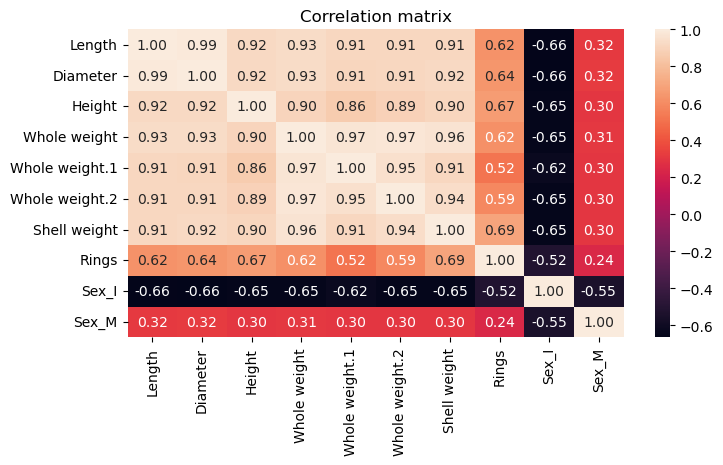

In [6]:
corr = df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, fmt="0.2f")
plt.title("Correlation matrix")
plt.show()

In [7]:
X = df.drop(columns="Rings")
y = df["Rings"]

# Splitting into training & testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [9]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [10]:
y_pred = reg.predict(X_test)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE: ", rmsle)

RMSLE:  0.15597148081851295


C:\Users\anmol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anmol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


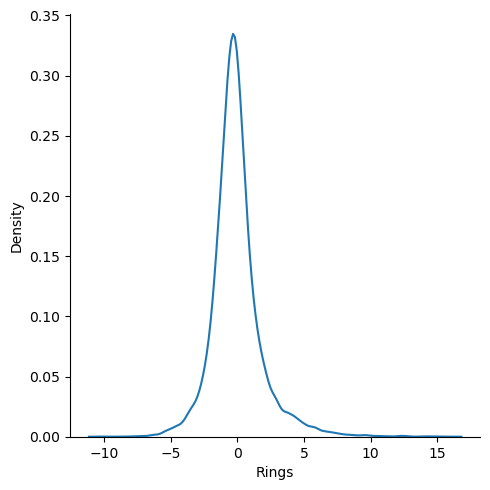

In [11]:
sns.displot(y_test - y_pred, kind="kde")
plt.show()

# XGBoost

In [12]:
reg = XGBRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
y_pred = reg.predict(X_test)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE: ", rmsle)

RMSLE:  0.1526798095577102


C:\Users\anmol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anmol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


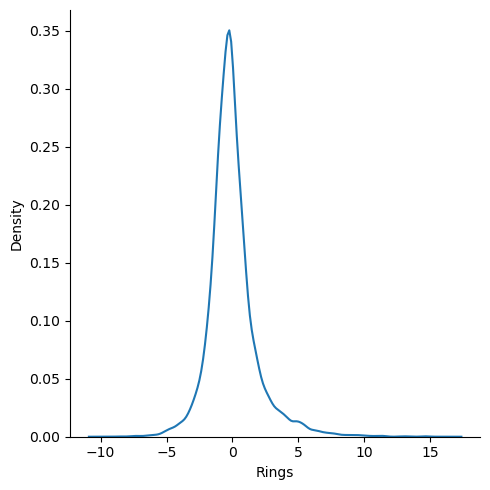

In [14]:
sns.displot(y_test - y_pred, kind="kde")
plt.show()

# Since XGBoost gives out a better RMSLE score, we'll use that algorithm

In [15]:
reg = XGBRegressor(n_jobs=-1, )
param_grid = {
    "max_depth": [None, 1, 2, 3, 4, 5],
    "learning_rate": [0.1, 0.01, 0.2]
}

gscv = GridSearchCV(reg, param_grid, cv=10, scoring="neg_mean_squared_log_error")

gscv.fit(X, y) # training on the entire dataset

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.2],
                         'max_depth': [None, 1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_log_error')

In [16]:
print("Best Score: ", gscv.best_score_)
print("Best Params: ", gscv.best_params_)

Best Score:  -0.022573453001994682
Best Params:  {'learning_rate': 0.2, 'max_depth': None}


# Read the testing dataset

In [18]:
test_df = pd.read_csv("./test.csv")
test_df.drop(columns="id", inplace=True)
test_df = pd.get_dummies(test_df, columns=["Sex"], drop_first=True)
test_df = pd.DataFrame(test_df, columns=X.columns)
test_df.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_I,Sex_M
0,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,False,True
1,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,False,True
2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,False,True
3,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,False,True
4,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,True,False


# Reading sample submission file

In [19]:
sample = pd.read_csv("./sample_submission.csv")
sample.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10


In [20]:
import math
pred = gscv.predict(test_df)
pred = np.array([math.floor(pred_i) for pred_i in pred])
pred

array([ 9,  9, 10, ..., 12, 13,  8])

In [21]:
sample["Rings"] = pred
sample.head()

,id,Rings
0,90615,9
1,90616,9
2,90617,10
3,90618,10
4,90619,7


# Submit the prediction

In [22]:
sample.to_csv("submission-xgboost.csv", index=False)